In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/head-and-torso/data/Data Description.docx
/kaggle/input/head-and-torso/data/Testing Data/User008/Timings ref HTC.txt
/kaggle/input/head-and-torso/data/Testing Data/User008/Timings.txt
/kaggle/input/head-and-torso/data/Testing Data/User008/Glass/gyroData.txt
/kaggle/input/head-and-torso/data/Testing Data/User008/Glass/accelData.txt
/kaggle/input/head-and-torso/data/Testing Data/User008/Glass/magnetData.txt
/kaggle/input/head-and-torso/data/Testing Data/User008/Glass/linearAccelData.txt
/kaggle/input/head-and-torso/data/Testing Data/User008/HTC - front/accelDataM.txt
/kaggle/input/head-and-torso/data/Testing Data/User008/HTC - front/linearAccelDataM.txt
/kaggle/input/head-and-torso/data/Testing Data/User008/HTC - front/gyroDataM.txt
/kaggle/input/head-and-torso/data/Testing Data/User008/Samsung - back/accelDataM.txt
/kaggle/input/head-and-torso/data/Testing Data/User008/Samsung - back/linearAccelDataM.txt
/kaggle/input/head-and-torso/data/Testing Data/User008/Samsung - back

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [50]:
# Load the data from CSV file into a pandas DataFrame
train = [None] * 17
train_final = [None] * 17
train_time_ranges = [None] * 17
#temp = [None] * 17
test = [None] * 17
test_final = [None] * 17
test_time_ranges = [None] * 17

for i in range(0,17):
    c = '/kaggle/input/head-and-torso/data/Training Data/User00' + str(i+1) + '/HTC - front/accelDataM.txt'
    train[i] = pd.read_csv(c, header=None)
    train[i].columns =['timestamp', 'x_axis', 'y_axis', 'z_axis']
    train[i]['timestamp'] = pd.to_datetime(train[i]['timestamp'], format='%Y-%m-%d %H:%M:%S:%f')
    # calculate the time difference between each timestamp and the first timestamp in milliseconds
    time_diff = (train[i]['timestamp'] - train[i]['timestamp'][0]).dt.total_seconds() * 1000

    # create a new column for milliseconds
    train[i]['milliseconds'] = time_diff
    
    
    #df['acceleration'] = np.sqrt(df['x_axis']**2 + df['y_axis']**2 + df['z_axis']**2)
    # print the updated dataframe
    #print(df.head())

In [51]:
for i in range(0,17):
    d = '/kaggle/input/head-and-torso/data/Testing Data/User00' + str(i+1) + '/HTC - front/accelDataM.txt'
    test[i] = pd.read_csv(d,header=None)
    test[i].columns =['timestamp', 'x_axis', 'y_axis', 'z_axis']
    test[i]['timestamp'] = pd.to_datetime(test[i]['timestamp'], format='%Y-%m-%d %H:%M:%S:%f')
    # calculate the time difference between each timestamp and the first timestamp in milliseconds
    time_diff_test = (test[i]['timestamp'] - test[i]['timestamp'][0]).dt.total_seconds() * 1000

    # create a new column for milliseconds
    test[i]['milliseconds'] = time_diff_test

In [52]:
train[0]

,timestamp,x_axis,y_axis,z_axis,milliseconds
0,2017-03-31 13:43:11.503,-1.77,3.23,8.690000,0.0
1,2017-03-31 13:43:11.507,-2.13,2.94,8.720000,4.0
2,2017-03-31 13:43:11.517,-1.86,3.13,8.720000,14.0
3,2017-03-31 13:43:11.521,-1.91,2.75,9.059999,18.0
4,2017-03-31 13:43:11.539,-1.64,2.65,9.370000,36.0
...,...,...,...,...,...
5546,2017-03-31 13:45:02.702,-0.22,1.07,9.780000,111199.0
5547,2017-03-31 13:45:02.705,-0.33,1.05,9.610000,111202.0
5548,2017-03-31 13:45:02.732,-0.33,1.03,9.800000,111229.0
5549,2017-03-31 13:45:02.763,-0.59,1.25,8.900000,111260.0


In [53]:
test[0]

,timestamp,x_axis,y_axis,z_axis,milliseconds
0,2017-04-26 17:01:45.525,-0.28,4.08,8.950000,0.0
1,2017-04-26 17:01:45.564,0.72,3.56,8.679999,39.0
2,2017-04-26 17:01:45.606,0.47,3.22,8.900000,81.0
3,2017-04-26 17:01:45.608,-0.46,2.65,9.650000,83.0
4,2017-04-26 17:01:45.608,-0.05,2.93,9.420000,83.0
...,...,...,...,...,...
5402,2017-04-26 17:03:33.714,0.36,3.01,9.280000,108189.0
5403,2017-04-26 17:03:33.729,1.52,3.30,7.510000,108204.0
5404,2017-04-26 17:03:33.789,1.10,3.78,7.490000,108264.0
5405,2017-04-26 17:03:33.792,0.46,3.10,8.570000,108267.0


In [54]:
test[1]

,timestamp,x_axis,y_axis,z_axis,milliseconds
0,2017-04-24 15:30:33.458,-0.70,6.31,7.100000,0.0
1,2017-04-24 15:30:33.458,-0.49,6.09,7.820000,0.0
2,2017-04-24 15:30:33.486,-0.27,5.91,8.889999,28.0
3,2017-04-24 15:30:33.490,-0.08,5.80,9.080000,32.0
4,2017-04-24 15:30:33.538,-0.18,5.61,7.390000,80.0
...,...,...,...,...,...
5947,2017-04-24 15:32:32.570,-0.37,3.57,9.059999,119112.0
5948,2017-04-24 15:32:32.635,-0.29,3.60,9.020000,119177.0
5949,2017-04-24 15:32:32.635,-0.37,3.46,7.640000,119177.0
5950,2017-04-24 15:32:32.637,-0.37,4.06,7.310000,119179.0


In [55]:
# define the time ranges and corresponding labels
train_time_ranges[0] = [(0, 8530), (8530, 10860),(10860, 35520),(35520, 38300), (39860,56080),(59930, 73290),(74680,77180),(77180,98540),(98540,200000)]
train_time_ranges[1] = [(0, 7980), (7981, 9810), (9810, 30070), (30070, 31960), (33720,47690),(50270, 65790),(67930,69520),(69520,90570),(90570,200000)]
train_time_ranges[2] = [(0, 6640), (6640, 9510), (9510, 32700), (32700, 34080), (48430,51070),(52300, 62060),(63950,66700),(66700,87320),(87320,200000)]
train_time_ranges[3] = [(0, 10890),(10890,14030),(14030,37470), (37470,40140),  (42930,61300),(64550, 78280),(80690,84970),(84970,107640),(107640,200000)]
train_time_ranges[4] = [(0, 5140), (5140, 7300), (7300,30180),  (30180,32400),  (34240,52170),(55660, 73090),(75020,76590),(76590,103620),(103620,200000)]
train_time_ranges[5] = [(0, 8700), (8700, 13520),(13520,39690), (39690,41540),  (44430,61220),(64580, 79650),(82080,85780),(85780,109960),(109960,200000)]
train_time_ranges[6] = [(0, 5010), (5010, 8580), (8580, 28830), (28830,32250),  (34540,48300),(51990, 62960),(65040,68090),(68090,89480),(89480,200000)]
train_time_ranges[7]=[(0,9150),(9150,11950),(11950,42100),(42100,45310),(46840,67030),(73670,93790),(95630,97460),(97460,123020),(123020,200000)]
train_time_ranges[8]=[(0,5360),(5360,7200),(7200,37610),(37610,41080),(42170,61400),(68990,86330),(88600,90170),(90170,119880),(119880,200000)]
train_time_ranges[9]=[(0,4080),(4080,5100),(5100,23400),(23400,25390),(26290,41300),(44320,52780),(53950,55310),(55310,73590),(73590,200000)]
train_time_ranges[10]=[(0,4260),(4260,6220),(6220,25680),(25680,27970),(29260,42440),(45120,54970),(56190,57270),(57270,76750),(76750,200000)]
train_time_ranges[11]=[(0,9070),(9070,11460),(11460,35320),(35320,37430),(39470,55370),(60170,75580),(77610,81750),(81750,101800),(101800,200000)]
train_time_ranges[12]=[(0,14250),(14250,17560),(17560,42860),(42860,46400),(48940,65710),(68080,80520),(82100,85600),(85600,106280),(106280,200000)]
train_time_ranges[13]=[(0,9100),(9100,13710),(13710,29750),(29750,31990),(34800,50000),(54570,64740),(66620,68800),(68800,94280),(94280,200000)]
train_time_ranges[14]=[(0,4250),(4250,8260),(8260,31860),(31860,35720),(37360,56130),(62080,78990),(81740,85010),(85010,110160),(110160,200000)]
train_time_ranges[15]=[(0,9200),(9200,11830),(11830,36570),(36570,39940),(41260,57830),(62600,75770),(77540,80300),(80300,104060),(104060,200000)]
train_time_ranges[16]=[(0,5680),(5680,8410),(8410,27400),(27400,30550),(31700,47410),(52950,66340),(67980,70990),(70990,90740),(90740,200000)]

#train_time_ranges[3]

In [56]:
test_time_ranges[0] = [(0,6260), (6260,8660),  (8660,33020), (33020,34590), (35380,51020), (55140,68370), (70040,72420),(72420,94480), (94480,200000)]
test_time_ranges[1] = [(0,17580),(17580,18870),(18870,42420),(42420,43890), (45670,59990), (61750,75730), (77120,78620),(78620,100890),(100890,200000)]
test_time_ranges[2] = [(0,5740), (5740,6010),  (6010,25150), (25150,28740), (29590,45750), (50290,65620), (67400,70960),(70960,92090), (92090,200000)]
test_time_ranges[3]=[(0,4500),(4500,7650),(7650,31730),(31730,33920),(35880,51980),(56290,71350),(73160,76240),(76240,99630),(99630,200000)]
test_time_ranges[4]=[(0,3740),(3740,5140),(5140,30210),(30210,32260),(34010,52800),(57590,74290),(76280,78130),(78130,103970),(103970,200000)]
test_time_ranges[5]=[(0,10720),(10720,15850),(15850,40250),(40250,43010),(44320,60090),(63920,79190),(81180,84930),(84930,105580),(105580,200000)]
test_time_ranges[6]=[(0,8120),(8120,12200),(12200,34750),(34750,36150),(37110,51660),(56030,67810),(70040,73220),(73220,95550),(95550,200000)]
test_time_ranges[7]=[(0,9520),(9520,13850),(13850,35020),(35020,37320),(39830,58630),(64710,77000),(79320,82830),(82830,104290),(104290,200000)]
test_time_ranges[8]=[(0,5090),(5090,6940),(6940,36720),(36720,39240),(40270,41390),(61210,67810),(86320,88100),(88100,116480),(116480,200000)]
test_time_ranges[9]=[(0,3910),(3910,5880),(5880,26010),(26010,27560),(28880,44630),(49420,57750),(59550,61500),(61500,81060),(81060,200000)]
test_time_ranges[10]=[(0,4350),(4350,6320),(6320,25240),(25240,27460),(28610,42350),(44840,55390),(56740,58340),(58340,67110),(67110,200000)]
test_time_ranges[11]=[(0,6170),(6170,8510),(8510,28950),(28950,30870),(32670,49110),(54010,68660),(70280,73000),(73000,92730),(92730,200000)]
test_time_ranges[12]=[(0,8490),(8490,11070),(11070,33560),(33560,36360),(37480,52050),(54060,69310),(70970,73140),(73140,95070),(95070,200000)]
test_time_ranges[13]=[(0,3290),(3290,4440),(4440,27490),(27490,29690),(31060,46930),(50930,60680),(62030,66200),(66200,87290),(87290,200000)]
test_time_ranges[14]=[(0,4760),(4760,8870),(8870,34480),(34480,38150),(39730,58250),(63530,79030),(81810,84930),(84930,109010),(109010,200000)]
test_time_ranges[15]=[(0,6150),(6150,9370),(9370,33470),(33470,36490),(37810,55800),(60820,76190),(78320,80690),(80690,105570),(105570,200000)]
test_time_ranges[16]=[(0,3800),(3800,6210),(6210,26600),(26600,29250),(30220,46660),(51490,65190),(67270,69210),(69210,90000),(90000,200000)]


In [57]:
def lable_data(df,time_ranges):
    labels = ['start_to_door', 'door', 'walk', 'door', 'stair', 'stair', 'door', 'walk', 'after_stop']
    #labels = ['start_to_door', int(1), int(3), int(1), int(2), int(2), int(1), int(3), 'after_stop']
    def assign_label(milliseconds):
        for i, (start_time, end_time) in enumerate(time_ranges):
            if start_time <= milliseconds < end_time:
                return labels[i]
        return 'rest' # return 'rest' if no time range matches

    # apply the function to create a new column "label"
    df['label'] = df['milliseconds'].apply(assign_label)

In [58]:
def clean_data_and_resetindex(df):
    remove_labels = [np.nan, 'start_to_door', 'after_stop', 'rest']

    # drop the rows that have labels in the remove_labels list
    df = df[~df['label'].isin(remove_labels)]
    df = df.reset_index(drop=True)
    return df

In [59]:
def window_sliding(df):
    # Set the window size
    window_size = 50
    stride = 25
    #p = str(df)
    #i = retrive_int(p)
    #tring  = str(df)
    #i = int(string[string.find('[')+1:string.find(']')])
    # Initialize a new DataFrame to hold the results
    result = pd.DataFrame(columns=['column2_avg', 'column3_avg', 'column4_avg', 'label'])

    # Iterate through the rows
    for i in range(0,len(df) - window_size + 1,stride):
        # Initialize a list to hold the values for this window
        window_values = []
        # Iterate through the columns
        for j in range(1, 4):
            # Calculate the average for this column in this window
            column_avg = df.iloc[i:i+window_size, j].sum()
            # Append the average to the list of values
            window_values.append(column_avg)
        # Get the label for this window
        #label = train_labels.loc[i, 'label']
        label = df.loc[i, 'label']
        # Append the label to the list of values
        window_values.append(label)
        # Add a new row to the results DataFrame with the averages and label for this window
        result.loc[i] = window_values
    return result
    #print(i)

In [60]:
for i in range(0,17):
    lable_data(train[i],train_time_ranges[i])
    train[i] = clean_data_and_resetindex(train[i])
    train_final[i] = window_sliding(train[i])
    train_final[i] = train_final[i].reset_index(drop=True)
    #train_final[i]["user"] = 'user00'  + str(i)
    train_final[i]["user"] = int(i)
    #display(train_final[i])
    

In [61]:
for i in range(0,17):
    lable_data(test[i],test_time_ranges[i])
    test[i] = clean_data_and_resetindex(test[i])
    test_final[i] = window_sliding(test[i])
    test_final[i] = test_final[i].reset_index(drop=True)
    #test_final[i]["user"] = 'user00'  + str(i)
    test_final[i]["user"] = int(i)
    #display(test_final[i])

In [62]:
#import pandas as pd

# assume you have a list of data frames called train
train_concatenated = pd.concat([train_final[i] for i in range(17)], ignore_index=True)


In [63]:
test_concatenated = pd.concat([test_final[i] for i in range(17)], ignore_index=True)

In [64]:
train_concatenated

,column2_avg,column3_avg,column4_avg,label,user
0,60.029999,-477.279987,-53.319999,door,0
1,36.659999,-470.619990,-103.929999,door,0
2,13.910000,-456.269990,-156.169998,door,0
3,42.450000,-463.239988,-91.719998,door,0
4,64.659998,-486.919987,-23.430000,door,0
...,...,...,...,...,...
2791,-89.679998,-501.629989,-9.759999,walk,16
2792,-44.690000,-528.729988,12.460001,walk,16
2793,-61.499999,-510.579990,-14.399999,walk,16
2794,-65.410000,-528.079988,-17.009998,walk,16


In [65]:
test_concatenated

,column2_avg,column3_avg,column4_avg,label,user
0,72.209999,-472.469990,-51.000000,door,0
1,70.109998,-474.679993,-85.990000,door,0
2,39.209999,-491.379990,-89.999999,door,0
3,-47.179999,-449.009991,-166.749998,door,0
4,-47.709999,-448.129993,-138.659998,door,0
...,...,...,...,...,...
2706,-44.989999,-498.929991,40.689998,walk,16
2707,-56.809998,-510.129990,-9.979999,walk,16
2708,-54.619999,-552.119991,-20.949999,walk,16
2709,-68.769999,-499.759992,-25.540001,walk,16


In [66]:
def normalize(df):
    from sklearn.preprocessing import MinMaxScaler

    # create scaler object
    scaler = MinMaxScaler()

    # normalize data
    df_norm = scaler.fit_transform(df.iloc[:, :-2])

    # convert normalized data back to dataframe
    df_norm = pd.DataFrame(df_norm, columns=df.columns[:-2])

    # add labels back to dataframe
    df_norm['label'] = df['label']
    df_norm['user'] = df['user']
    return df_norm


In [67]:
#train_concatenated = normalize(train_concatenated)
#test_concatenated = normalize(test_concatenated)

In [68]:
train_concatenated

,column2_avg,column3_avg,column4_avg,label,user
0,60.029999,-477.279987,-53.319999,door,0
1,36.659999,-470.619990,-103.929999,door,0
2,13.910000,-456.269990,-156.169998,door,0
3,42.450000,-463.239988,-91.719998,door,0
4,64.659998,-486.919987,-23.430000,door,0
...,...,...,...,...,...
2791,-89.679998,-501.629989,-9.759999,walk,16
2792,-44.690000,-528.729988,12.460001,walk,16
2793,-61.499999,-510.579990,-14.399999,walk,16
2794,-65.410000,-528.079988,-17.009998,walk,16


In [69]:
test_concatenated

,column2_avg,column3_avg,column4_avg,label,user
0,72.209999,-472.469990,-51.000000,door,0
1,70.109998,-474.679993,-85.990000,door,0
2,39.209999,-491.379990,-89.999999,door,0
3,-47.179999,-449.009991,-166.749998,door,0
4,-47.709999,-448.129993,-138.659998,door,0
...,...,...,...,...,...
2706,-44.989999,-498.929991,40.689998,walk,16
2707,-56.809998,-510.129990,-9.979999,walk,16
2708,-54.619999,-552.119991,-20.949999,walk,16
2709,-68.769999,-499.759992,-25.540001,walk,16


# User Recognition

Neural Networks


In this model, we have 4 input features going through 3 fully connected layers with ReLU activation and dropout, followed by an output layer with 17 neurons corresponding to the 17 output labels. The loss function is cross-entropy, and we're using the Adam optimizer with a learning rate of 0.001. The optimizer used is Adam with a learning rate of 0.001. The code trains the model for 1000 epochs and prints the best accuracy of all of them.

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
#train_data = pd.read_csv('train_data.csv')

# Preprocess the data
le = LabelEncoder()
train_concatenated['label'] = le.fit_transform(train_concatenated['label'])
#train_concatenated['user'] = le.fit_transform(train_concatenated['user'])
test_concatenated['label'] = le.fit_transform(test_concatenated['label'])
#test_concatenated['user'] = le.fit_transform(test_concatenated['user'])

#X_train, X_test, y_train, y_test = train_test_split(train_data.drop('label', axis=1), train_data['label'], test_size=0.2, random_state=42)
X_train = train_concatenated.drop('user',axis =1)
y_train = train_concatenated['user']
X_test = test_concatenated.drop('user',axis =1)
y_test = test_concatenated['user']
# Convert data to PyTorch tensors
X_train = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 17)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Initialize the model and the optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
temp1 = [None] * 10000
# Train the model
for epoch in range(1000):
    running_loss = 0.0
    optimizer.zero_grad()

    # Forward pass
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    # Evaluate the model
    with torch.no_grad():
        outputs_test = net(X_test)
        _, predicted = torch.max(outputs_test.data, 1)
        total = y_test.size(0)
        correct = (predicted == y_test).sum().item()
        accuracy = correct / total
        temp1[i] = accuracy


        #print(f"Epoch {epoch+1} - Training loss: {running_loss:.4f} - Validation accuracy: {accuracy:.4f}")
accuracy_best1 = max(x for x in temp1 if x is not None)
print("Best_accuracy from neural network = " ,accuracy_best1)


Best_accuracy from neural network =  0.24714127628181484


Various Classification Algorithms

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


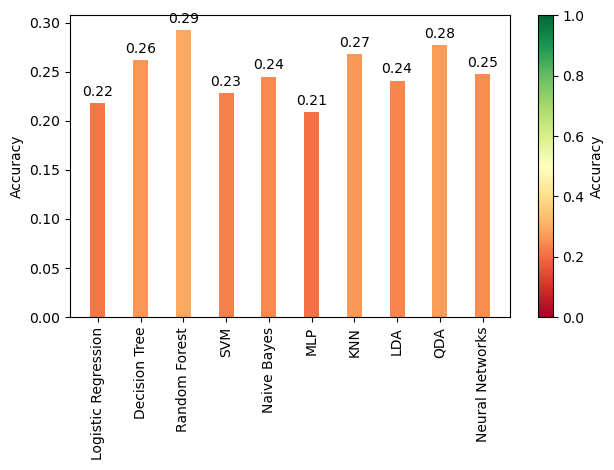

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from matplotlib import cm

# Define classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GaussianNB(),
    MLPClassifier(),
    KNeighborsClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

# Train classifiers and predict on test set
accuracies1 = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies1.append(acc)
#adding neural network accuracy
accuracies1.append(accuracy_best1)
# Plot accuracies
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'MLP', 'KNN', 'LDA', 'QDA', 'Neural Networks']

# Define the color map
color_map1 = cm.get_cmap('RdYlGn')

# Map the accuracies to colors
colors1 = color_map1(accuracies1)

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(x, accuracies1, width, color=colors1)

# Set the labels and legend
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 90)
cbar = fig.colorbar(cm.ScalarMappable(norm=None, cmap=color_map1), ax=ax)
cbar.ax.set_ylabel('Accuracy')

# Add text labels to bars
for rect, acc in zip(rects, accuracies1):
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(acc),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
#plt.savefig('/kaggle/working/user_recognition.png')

# Activity Recognition

Neural Networks

This neural network consists of 3 fully connected layers with 64, 32, and 3 neurons respectively, and uses the ReLU activation function. The cross-entropy loss function and the Adam optimizer are used for training. The neural network is trained for a certain number of epochs(1000) using a training dataset and evaluated on a validation dataset to monitor the performance.

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
#train_data = pd.read_csv('train_data.csv')

# Preprocess the data
le = LabelEncoder()
#train_concatenated['label'] = le.fit_transform(train_concatenated['label'])
#train_concatenated['user'] = le.fit_transform(train_concatenated['user'])
#test_concatenated['label'] = le.fit_transform(test_concatenated['label'])
#test_concatenated['user'] = le.fit_transform(test_concatenated['user'])

#X_train, X_test, y_train, y_test = train_test_split(train_data.drop('label', axis=1), train_data['label'], test_size=0.2, random_state=42)
X_train = train_concatenated.drop('label',axis =1)
y_train = train_concatenated['label']
X_test = test_concatenated.drop('label',axis =1)
y_test = test_concatenated['label']
# Convert data to PyTorch tensors
X_train = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# Define the neural network model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model and the optimizer
model = MyModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
temp2 = [None] * 10000
# Train the model
for epoch in range(1000):
    running_loss = 0.0
    optimizer.zero_grad()

    # Forward pass
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    # Evaluate the model
    with torch.no_grad():
        outputs_test = net(X_test)
        _, predicted = torch.max(outputs_test.data, 1)
        total = y_test.size(0)
        correct = (predicted == y_test).sum().item()
        accuracy = correct / total
        temp2[i] = accuracy


        #print(f"Epoch {epoch+1} - Training loss: {running_loss:.4f} - Validation accuracy: {accuracy:.4f}")
accuracy_best2 = max(x for x in temp2 if x is not None)
print("Best_accuracy from neural network = " ,accuracy_best2)


Best_accuracy from neural network =  0.6849870896348211


K Means - Activity Recognition

In [73]:
train_concatenated

,column2_avg,column3_avg,column4_avg,label,user
0,60.029999,-477.279987,-53.319999,0,0
1,36.659999,-470.619990,-103.929999,0,0
2,13.910000,-456.269990,-156.169998,0,0
3,42.450000,-463.239988,-91.719998,0,0
4,64.659998,-486.919987,-23.430000,0,0
...,...,...,...,...,...
2791,-89.679998,-501.629989,-9.759999,2,16
2792,-44.690000,-528.729988,12.460001,2,16
2793,-61.499999,-510.579990,-14.399999,2,16
2794,-65.410000,-528.079988,-17.009998,2,16


In [74]:
test_concatenated

,column2_avg,column3_avg,column4_avg,label,user
0,72.209999,-472.469990,-51.000000,0,0
1,70.109998,-474.679993,-85.990000,0,0
2,39.209999,-491.379990,-89.999999,0,0
3,-47.179999,-449.009991,-166.749998,0,0
4,-47.709999,-448.129993,-138.659998,0,0
...,...,...,...,...,...
2706,-44.989999,-498.929991,40.689998,2,16
2707,-56.809998,-510.129990,-9.979999,2,16
2708,-54.619999,-552.119991,-20.949999,2,16
2709,-68.769999,-499.759992,-25.540001,2,16


In [75]:
from sklearn.preprocessing import StandardScaler

# select the columns to normalize
cols_to_normalize = ['column2_avg', 'column3_avg', 'column4_avg', 'user']
kmeans_traindata = train_concatenated.copy()
kmeans_testdata = test_concatenated.copy()
# create a StandardScaler object and apply it to the selected columns
scaler = StandardScaler()
kmeans_traindata[cols_to_normalize] = scaler.fit_transform(kmeans_traindata[cols_to_normalize])
kmeans_testdata[cols_to_normalize] = scaler.fit_transform(kmeans_testdata[cols_to_normalize])


In [76]:
kmeans_traindata

,column2_avg,column3_avg,column4_avg,label,user
0,0.377316,-0.343552,-0.675024,0,-1.659454
1,0.099541,-0.322528,-1.396468,0,-1.659454
2,-0.170865,-0.277229,-2.141149,0,-1.659454
3,0.168361,-0.299232,-1.222415,0,-1.659454
4,0.432349,-0.373983,-0.248942,0,-1.659454
...,...,...,...,...,...
2791,-1.402133,-0.420419,-0.054076,2,1.644830
2792,-0.867383,-0.505967,0.262669,2,1.644830
2793,-1.067186,-0.448672,-0.120220,2,1.644830
2794,-1.113660,-0.503915,-0.157425,2,1.644830


In [77]:
kmeans_testdata

,column2_avg,column3_avg,column4_avg,label,user
0,1.066179,-0.317783,-0.143124,0,-1.604223
1,1.035328,-0.324819,-0.610060,0,-1.604223
2,0.581377,-0.377983,-0.663573,0,-1.604223
3,-0.687777,-0.243099,-1.687790,0,-1.604223
4,-0.695563,-0.240297,-1.312933,0,-1.604223
...,...,...,...,...,...
2706,-0.655604,-0.402019,1.080466,2,1.613570
2707,-0.829251,-0.437674,0.404282,2,1.613570
2708,-0.797078,-0.571349,0.257889,2,1.613570
2709,-1.004955,-0.404661,0.196636,2,1.613570


In [78]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data_train_input_kmeans = kmeans_traindata[['column2_avg', 'column3_avg', 'column4_avg', 'user']]
data_test_input_kmeans = kmeans_testdata[['column2_avg', 'column3_avg', 'column4_avg', 'user']]
kmeans = KMeans(n_clusters=3, random_state =32)
kmeans.fit(data_train_input_kmeans)

kmeans_testdata['predicted_cluster'] = kmeans.predict(data_test_input_kmeans)

# Add the cluster labels to the original dataframe
kmeans_traindata["cluster"] = kmeans.labels_

# Print the number of points in each cluster
print(kmeans_traindata["cluster"].value_counts())



1    1584
0     868
2     344
Name: cluster, dtype: int64


In [79]:
user_cluster_counts = kmeans_traindata.groupby(['cluster', 'label']).size().reset_index(name='count')
cluster_user_counts = user_cluster_counts.groupby('cluster').apply(lambda x: x[['label', 'count']].to_dict('list')).to_dict()
cluster_user_counts

{0: {'label': [0, 1, 2], 'count': [94, 346, 428]},
 1: {'label': [0, 1, 2], 'count': [148, 529, 907]},
 2: {'label': [0, 1, 2], 'count': [42, 122, 180]}}

from above above cell , we can assume in cluster 0 it has 868 points, which we can assume as stairs, cluster 1 having 1584 points as walk and cluster 2 with 344 points as door

meaning , for cluster mapping , we can assume 0 : stairs, 1 : walk and 2 : door

amd from cluster_user_counts, we can say in all the clusters, label 2 is highly dominating, by which we cannot rename cluster with highest individual label.

In [80]:
kmeans_traindata


,column2_avg,column3_avg,column4_avg,label,user,cluster
0,0.377316,-0.343552,-0.675024,0,-1.659454,1
1,0.099541,-0.322528,-1.396468,0,-1.659454,1
2,-0.170865,-0.277229,-2.141149,0,-1.659454,1
3,0.168361,-0.299232,-1.222415,0,-1.659454,1
4,0.432349,-0.373983,-0.248942,0,-1.659454,1
...,...,...,...,...,...,...
2791,-1.402133,-0.420419,-0.054076,2,1.644830,0
2792,-0.867383,-0.505967,0.262669,2,1.644830,0
2793,-1.067186,-0.448672,-0.120220,2,1.644830,0
2794,-1.113660,-0.503915,-0.157425,2,1.644830,0


In [81]:
kmeans_testdata

,column2_avg,column3_avg,column4_avg,label,user,predicted_cluster
0,1.066179,-0.317783,-0.143124,0,-1.604223,1
1,1.035328,-0.324819,-0.610060,0,-1.604223,1
2,0.581377,-0.377983,-0.663573,0,-1.604223,1
3,-0.687777,-0.243099,-1.687790,0,-1.604223,1
4,-0.695563,-0.240297,-1.312933,0,-1.604223,1
...,...,...,...,...,...,...
2706,-0.655604,-0.402019,1.080466,2,1.613570,0
2707,-0.829251,-0.437674,0.404282,2,1.613570,0
2708,-0.797078,-0.571349,0.257889,2,1.613570,0
2709,-1.004955,-0.404661,0.196636,2,1.613570,0


In [82]:
# define the mapping of old to new values
mapping_for_label = {0: 'door', 1: 'stairs', 2: 'walk'}
mapping_for_predicted_cluster = {0: 'stairs', 1: 'walk', 2: 'door'}

# replace the old values with the new values
kmeans_testdata['label'] = kmeans_testdata['label'].replace(mapping_for_label)
kmeans_testdata['predicted_cluster'] = kmeans_testdata['predicted_cluster'].replace(mapping_for_predicted_cluster)



In [83]:
kmeans_testdata

,column2_avg,column3_avg,column4_avg,label,user,predicted_cluster
0,1.066179,-0.317783,-0.143124,door,-1.604223,walk
1,1.035328,-0.324819,-0.610060,door,-1.604223,walk
2,0.581377,-0.377983,-0.663573,door,-1.604223,walk
3,-0.687777,-0.243099,-1.687790,door,-1.604223,walk
4,-0.695563,-0.240297,-1.312933,door,-1.604223,walk
...,...,...,...,...,...,...
2706,-0.655604,-0.402019,1.080466,walk,1.613570,stairs
2707,-0.829251,-0.437674,0.404282,walk,1.613570,stairs
2708,-0.797078,-0.571349,0.257889,walk,1.613570,stairs
2709,-1.004955,-0.404661,0.196636,walk,1.613570,stairs


In [84]:
count = len(kmeans_testdata[kmeans_testdata['label'] == kmeans_testdata['predicted_cluster']])

In [85]:
accuracy_kmeans = count /len(kmeans_testdata)
print(accuracy_kmeans)

0.4710438952416083


Various Classification Algorithms

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


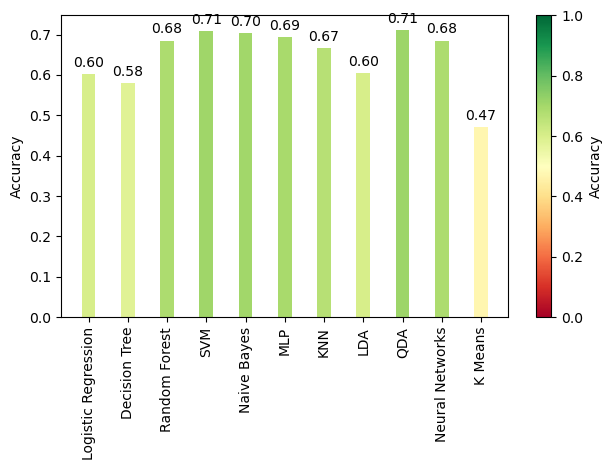

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from matplotlib import cm

# Define classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GaussianNB(),
    MLPClassifier(),
    KNeighborsClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

# Train classifiers and predict on test set
accuracies2 = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies2.append(acc)
#adding neural network accuracy
accuracies2.append(accuracy_best2)
accuracies2.append(accuracy_kmeans)
# Plot accuracies
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'MLP', 'KNN', 'LDA', 'QDA', 'Neural Networks', 'K Means']

# Define the color map
color_map2 = cm.get_cmap('RdYlGn')

# Map the accuracies to colors
colors2 = color_map2(accuracies2)

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(x, accuracies2, width, color=colors2)

# Set the labels and legend
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 90)
cbar = fig.colorbar(cm.ScalarMappable(norm=None, cmap=color_map2), ax=ax)
cbar.ax.set_ylabel('Accuracy')

# Add text labels to bars
for rect, acc in zip(rects, accuracies2):
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(acc),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
#plt.savefig('/kaggle/working/activity_recognition.png',dpi=300, bbox_inches='tight')